In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mall customers - mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop("CustomerID", axis=1)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df = df.rename(columns = {"Gender":"gender", "Age":"age", "Annual Income (k$)":"income", "Spending Score (1-100)":"score"})

In [6]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


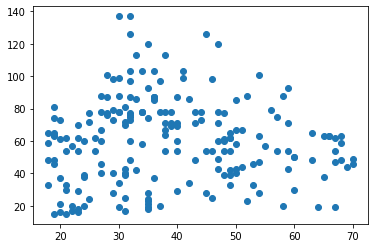

In [7]:
plt.scatter(df.age, df.income)

Text(0.5, 1.0, 'Score Vs Income')

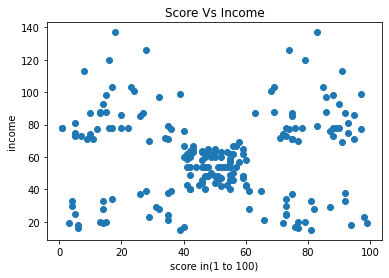

In [8]:
plt.scatter(df.score, df.income)
plt.xlabel("score in(1 to 100)")
plt.ylabel("income")
plt.title("Score Vs Income")

StopIteration: 

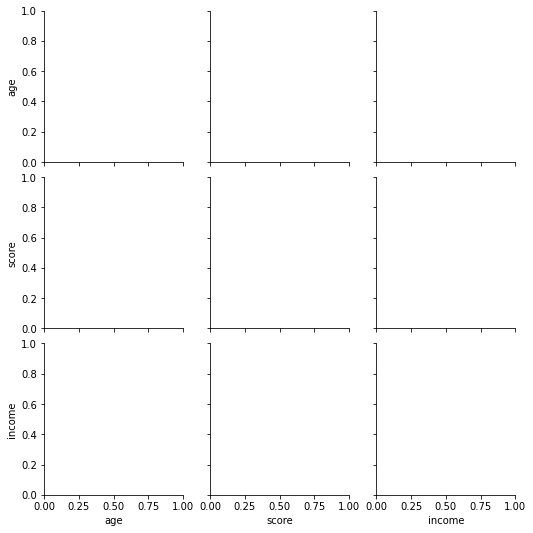

In [9]:
sns.pairplot(df[["age","score","income"]])
plt.show()

Text(0.5, 1.0, 'Score Vs Income')

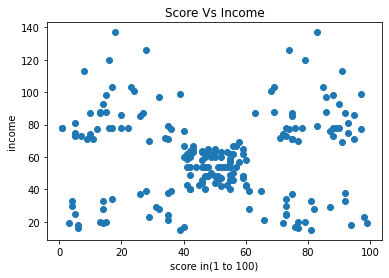

In [10]:
plt.scatter(df.score, df.income) # Add color & marker
plt.xlabel("score in(1 to 100)")
plt.ylabel("income")
plt.title("Score Vs Income")

Starting KMeans

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=5) #creatiing kmeans objects

In [13]:
km.fit(df[["score","income"]]) #fit for training

KMeans(n_clusters=5)

In [14]:
#Creating a new_cluster
df["new_cluster"] = km.predict(df[["score","income"]])

In [15]:
df.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


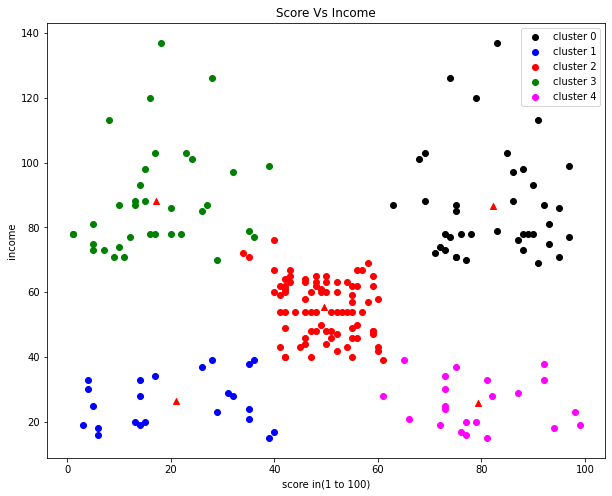

In [30]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

plt.figure(figsize=(10,8))

plt.scatter(df0.score, df0.income, color="black", label="cluster 0")
plt.scatter(df1.score, df1.income, color="blue", label="cluster 1")
plt.scatter(df2.score, df2.income, color="red", label="cluster 2")
plt.scatter(df3.score, df3.income, color="green", label="cluster 3")
plt.scatter(df4.score, df4.income, color="magenta", label="cluster 4")

plt.scatter(center1[:,0], center1[:,1], color="red", marker="^")

plt.xlabel("score in(1 to 100)")
plt.ylabel("income")
plt.title("Score Vs Income")

plt.legend()
plt.show()

In [28]:
# Cluster centroid
center1 = km.cluster_centers_
center1

array([[82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

In [31]:
wcss = []
cluster_range = range(1,15)

for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[["score","income"]])
    wcss.append(km2.inertia_) #inertia_ is the wcss value

In [32]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25050.832307547527,
 21838.863692828912,
 19704.123543147773,
 17602.19046838677,
 15810.343426539726,
 14665.022686044114,
 12971.588383283384]

Text(0, 0.5, '')

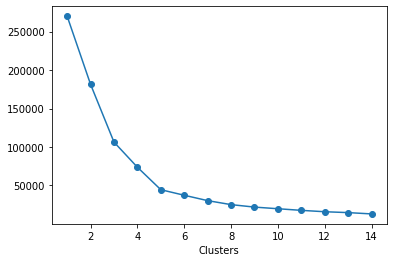

In [33]:
plt.plot(cluster_range,wcss, marker="o")

plt.xlabel("Clusters")
plt.ylabel("")